**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources, such as: [datacamp](https://www.datacamp.com/tutorial/tutorial-normal-equation-for-linear-regression#what-is-the-normal-equation-). Every effort has been made to trace copyright holders of the materials used in this notebook. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 09: Selección de hiperparámetros (*hyperparameter optimization*)

## The Normal Equation vs Gradient Descent

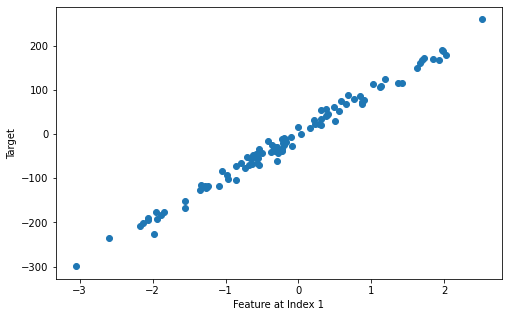

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate a regression problem
X, y = make_regression(
    n_samples=100,
    n_features=2,
    n_informative=2,
    noise = 10,
    random_state=25
    )

# Visualize feature at index 1 vs target
plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 1], y, marker='o')
plt.xlabel("Feature at Index 1")
plt.ylabel("Target")
plt.show()

### The normal equation from scratch

In [2]:
# adds x0 = 1 to each instance
X_b = np.concatenate([np.ones((len(X), 1)), X], axis=1)
# calculate normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# best values for theta
intercept, *coef = theta_best
print(f"Intercept: {intercept}\n\
Coefficients: {coef}")

Intercept: 0.3592124267797836
Coefficients: [6.129199175400599, 96.44309685893136]


### The normal equation using Scikit-learn

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print(f"Intercept: {lr.intercept_}\n\
Coefficients: {lr.coef_}")

Intercept: 0.3592124267797807
Coefficients: [ 6.12919918 96.44309686]


Los modelos de *machine learning* son parametrizados por lo que los resultados están en función de dichos valores. Los parámetros del algoritmo y que no dependen de los datos son denominados hiperparámetros, mientras que el término parámetros es exclusivo de los coeficientes que encuentra el modelo y dependen de los datos. 

## Curva de validación con Sklearn

La Curva de Vallidación visualiza la métrica del desempeño del modelo sobre un rango de valores para algún hiperparámetro. Es por lo tanto utilizado para seleccionar los hiperparámetros que maximicen el desempeño del modelo.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter("ignore")

Para este ejemplo se utilizará la base de datos para regresión de *boston*.

In [2]:
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)

Como algoritmo se utilizará el vecino mas cercano. Inicialmente se ejecutará el modelo para un hiperparámetro que determina el número de vecinos a utilizar. Inicialmente como ejemplo se utiliza un valor de K=10.

In [46]:
results=cross_validate(KNeighborsRegressor(n_neighbors=10), X, y, cv=5)
results

{'fit_time': array([0.00498724, 0.00498676, 0.00199103, 0.00299048, 0.00299168]),
 'score_time': array([0.06981349, 0.05090117, 0.04687548, 0.04686785, 0.04684377]),
 'test_score': array([0.85354294, 0.89466997, 0.90704499, 0.93033766, 0.90217437])}

In [47]:
results['test_score'].mean()

0.8975539883713222

Para seleccionar el valor de K que optimice el algoritmo, primero definiremos el rango de K en el cual evaluaremos la función. Se utilizarán valores pares de 2 hasta 50.

In [12]:
k = np.arange(2,100,2)
k

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

Y se llama la función *validation_curve* en el rango de valores K definido:

In [22]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, y, param_name='n_neighbors', param_range=k, cv=6)

In [25]:
print(test_scores)

[[-1.94329049e+00 -2.71414218e-01 -5.69674242e-01 -1.00729658e-01
   2.17776168e-02  3.26257436e-02]
 [-1.36889327e+00 -3.68977722e-01 -4.61116612e-01 -1.05162587e-01
   3.57024146e-02 -6.08582565e-02]
 [-1.12725382e+00 -3.15025776e-01 -4.46686154e-01 -1.06483293e-01
   6.79583536e-02 -1.11819154e-01]
 [-1.16275280e+00 -2.65576874e-01 -4.58657537e-01 -1.36275397e-01
   7.76251990e-02 -8.28163506e-02]
 [-1.13942102e+00 -2.91221246e-01 -4.61653398e-01 -9.77530399e-02
   8.83450953e-02  8.48380027e-02]
 [-1.12299723e+00 -2.39861307e-01 -4.72087197e-01 -8.51962420e-02
   9.21088229e-02  7.76457230e-02]
 [-1.00403128e+00 -1.89104499e-01 -4.99800906e-01 -7.96624473e-02
   8.36897519e-02  5.64562199e-02]
 [-1.01966661e+00 -1.68216204e-01 -5.10133783e-01 -9.44081264e-02
   7.66577385e-02 -2.47838263e-02]
 [-9.68744971e-01 -1.55851295e-01 -5.19479932e-01 -6.60309772e-02
   7.38239257e-02 -3.12714174e-02]
 [-8.99111886e-01 -1.38381607e-01 -5.23019840e-01 -7.06740104e-02
   7.13045734e-02 -1.3082

Como se obtienen 5 valores de *score* por cada valor de K, por lo cual se debe promediar dicho valor en las 50 valores de k para los datos de entrenamiento y para los datos de validación.

In [30]:
#np.mean(test_scores,axis=1)
np.mean(train_scores,axis=1)

array([0.85621024, 0.75116866, 0.68755467, 0.64242127, 0.60882598,
       0.56913984, 0.55230706, 0.53225376, 0.51120138, 0.48416616,
       0.46008627, 0.44475883, 0.42870573, 0.41627094, 0.40322169,
       0.3896899 , 0.37853898, 0.36812953, 0.35479556, 0.34428472,
       0.33416722, 0.32736341, 0.32062301, 0.31539128, 0.31041503,
       0.30641081, 0.30188278, 0.29612578, 0.29219971, 0.2863675 ,
       0.28223364, 0.27855611, 0.2740922 , 0.27129727, 0.26905237,
       0.26600445, 0.26377098, 0.26121681, 0.25864349, 0.25576968,
       0.25353785, 0.2513059 , 0.24885626, 0.24874429, 0.24812699,
       0.24725074, 0.24461871, 0.24364258, 0.2427999 ])

In [18]:
np.mean(test_scores,axis=1)

array([-0.47178421, -0.38821767, -0.33988497, -0.33807563, -0.30281094,
       -0.29173124, -0.27207553, -0.2900918 , -0.27792578, -0.2817845 ,
       -0.32353492, -0.3327628 , -0.33138449, -0.32391876, -0.32880529,
       -0.31591647, -0.30295832, -0.29999122, -0.2919167 , -0.29596931,
       -0.29644549, -0.28926687, -0.27258819, -0.2695589 , -0.26482364,
       -0.24466352, -0.24230017, -0.23118269, -0.21868815, -0.21451769,
       -0.20733258, -0.20343067, -0.19782443, -0.19487774, -0.18700842,
       -0.18247756, -0.1786529 , -0.18014526, -0.18189563, -0.18278153,
       -0.18911318, -0.18854742, -0.19207456, -0.18774147, -0.18741827,
       -0.1890635 , -0.19687255, -0.20391164, -0.20849514])

Y se grafica la Curva de Validación.

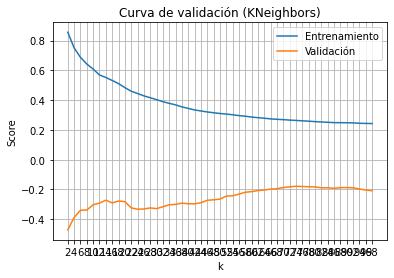

In [27]:
plt.figure()
plt.title("Curva de validación (KNeighbors)")    
plt.xlabel("k")
plt.ylabel("Score")
plt.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
plt.plot(np.mean(test_scores,axis=1),label="Validación")
#plt.ylim(0, 1)
plt.xticks(np.arange(49),k)
plt.legend(loc="best")
plt.grid(True);

Lo que señalan los resultados es que el mejor desempeño lo tiene para un valor de K=2. A medida que aumenta el número de K el desempeño del modelo, tanto para el entrenamiento como para la validación, se reduce.

A continuacion se presenta otro ejemplo de Curva de Validación con el método de *Support Vector machine* para clasificación con el hiperparámetro $\gamma$.

In [13]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC

In [14]:
digits = load_digits()
X, y = digits.data, digits.target

In [15]:
param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

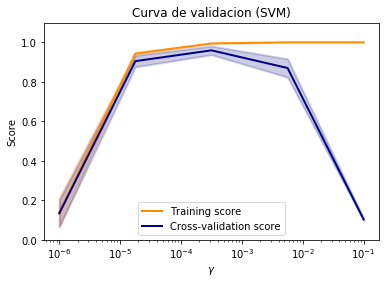

In [37]:
plt.title("Curva de validación (SVM)")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Entrenamiento",color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Validación", color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best");

## Curva de validación con yellowbrick

In [8]:
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.datasets import load_energy

In [9]:
X, y = load_energy()

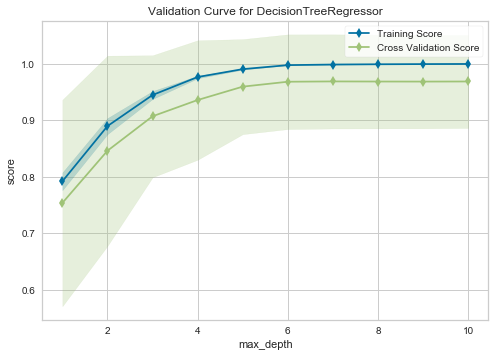

In [10]:
from sklearn.tree import DecisionTreeRegressor
viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=10, scoring="r2")
viz.fit(X, y)
viz.show();

# Funciones para selección de hiperparámetros

La librearía de Sklearn tiene dos métodos para seleccionar automáticamente los mejores hiperparámetros del modelo:

- Grid Search Parameter Tuning.
- Random Search Parameter Tuning.

## Grid Search
El *Grid search* es un método para ajustar los parámetros que consiste en crear y evaluar un modelo metódicamente  para cada combinación de hiperparámetros especificados en la grilla de búsqueda definida.

In [31]:
from sklearn.model_selection import GridSearchCV

En el siguiente ejemplo se utilizará la misma base de datos del ejemplo anterior.

In [42]:
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.431848787926522
1.0


Los resultados señalan que el mejor parámetro alpha es 1 para obtener un *score* de 0.5, lo que señala un grave problema de *bias* de nuestro modelo.

## Random Search
El método de *Random search* selecciona aleatoriamente valores del hiperparámetro de una distribución uniforme por un número especificado de iteracciones. Un modelo es construido y evaluado para cada combinación de parámetros seleccionados.

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [52]:
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=1)
rsearch.fit(X, y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.5063905111241171
0.9888610889064947


Los resultados arrojan que el mejor valor del hiperparámetro es 0.98 para un desempeño de 0.5.